In [1]:
import keras
from keras import layers

Using TensorFlow backend.


In [2]:
import tensorflow as tf
print('Tensorflow Version:{}'.format(tf.__version__))
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np

Tensorflow Version:2.0.0


In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals
import os
import os.path as osp

In [4]:
tf.test.is_gpu_available()

True

In [5]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
train_labels.shape

(60000,)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [11]:
train_images = np.expand_dims(train_images, -1)

In [12]:
train_images.shape

(60000, 28, 28, 1)

In [13]:
test_images = np.expand_dims(test_images, -1)
test_images.shape

(10000, 28, 28, 1)

In [14]:
model = tf.keras.Sequential()   #顺序模型
model.add(tf.keras.layers.Conv2D(64,(3,3), input_shape = (28, 28, 1), activation = 'relu', padding='same'))
model.add(tf.keras.layers.Conv2D(64,(3,3), activation = 'relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Conv2D(128,(3,3), activation = 'relu', padding='same'))
model.add(tf.keras.layers.Conv2D(128,(3,3), activation = 'relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Conv2D(256,(3,3), activation = 'relu', padding='same'))
model.add(tf.keras.layers.Conv2D(256,(3,3), activation = 'relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Conv2D(512,(3,3), activation = 'relu', padding='same'))
model.add(tf.keras.layers.Conv2D(512,(3,3), activation = 'relu', padding='same'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0

In [16]:
model.compile(optimizer="adam",
             loss='sparse_categorical_crossentropy',
             metrics=['acc']
             )

In [17]:
history = model.fit(train_images, train_labels, epochs=30, validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 99s 2ms/sample - loss: 0.8883 - acc: 0.6604 - val_loss: 0.4632 - val_acc: 0.8256
Epoch 2/30
60000/60000 [==============================] - 95s 2ms/sample - loss: 0.4802 - acc: 0.8233 - val_loss: 0.4130 - val_acc: 0.8442
Epoch 3/30
60000/60000 [==============================] - 96s 2ms/sample - loss: 0.4275 - acc: 0.8424 - val_loss: 0.3869 - val_acc: 0.8544
Epoch 4/30
60000/60000 [==============================] - 95s 2ms/sample - loss: 0.3974 - acc: 0.8536 - val_loss: 0.3456 - val_acc: 0.8741
Epoch 5/30
60000/60000 [==============================] - 96s 2ms/sample - loss: 0.3874 - acc: 0.8595 - val_loss: 0.3572 - val_acc: 0.8670
Epoch 6/30
60000/60000 [==============================] - 93s 2ms/sample - loss: 0.3712 - acc: 0.8650 - val_loss: 0.3469 - val_acc: 0.8730
Epoch 7/30
60000/60000 [==============================] - 93s 2ms/sample - loss: 0.3605 - acc: 0.8702 - val_loss: 0.

In [19]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

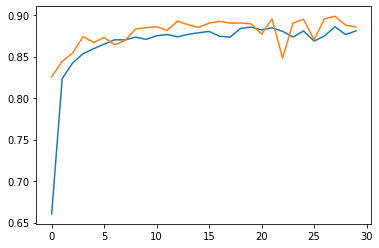

In [20]:
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.plot(history.epoch, history.history.get('val_acc'), label='val_acc')

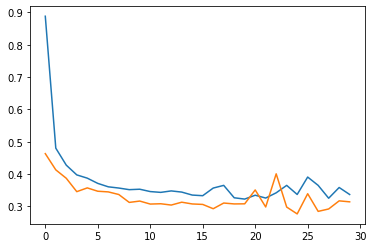

In [21]:
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.plot(history.epoch, history.history.get('val_loss'), label='val_loss')